## Домашнее задание № 22.  Case study

### Задание 1

Вернемся к набору данных о видеоиграх.

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?

2) Критикам нравятся больше игры на PC или на PS4?

3) Критикам больше нравятся стрелялки или стратегии?

Для каждого вопроса:

сформулируйте нулевую и альтернативную гипотезы;
выберите пороговый уровень статистической значимости;
опишите полученные результаты статистического теста.

In [2]:
# импорт необходимых библиотек
# импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from pylab import rcParams
rcParams['figure.figsize'] = 15,7


In [3]:
df = pd.read_csv('DATA/video_games_sales.csv')
df.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


### 1. Как критики относятся к спортивным играм?

H0 - критики в среднем оценивают спортивные игры выше 7.5

H1 - критики в среднем оценивают спортивные игры ниже значения 7.5

Критерий значимости примем на уровне 5%

In [4]:
from scipy import stats as st

alpha = 0.05
df1 = df[['Genre','Critic_Score']].copy().dropna()
df1 = df1[df1.Genre.eq('Sports')]

result = st.ttest_1samp(df1['Critic_Score'], 7.5)
print(result)

if (result.statistic < 0) & (result.pvalue / 2 < alpha):
    print('Отвергаем нулевую гипотезу, средняя оценка ниже 7.5')
else:
    print('Не отвергаем нулевую нулевую гипотезу, критики высоко оценивают спортивные симмуляторы')

Ttest_1sampResult(statistic=-3.719660933773832, pvalue=0.00021577789041608633)
Отвергаем нулевую гипотезу, средняя оценка ниже 7.5


In [5]:
df1[df1.Genre.eq('Sports')].mean()

Critic_Score    7.291424
dtype: float64

### 2. Критикам нравятся больше игры на PC или на PS4?

H0 - критикам нравятся игры одинаково на обеих платформах

H1 - есть значимые отличия в оценках критиков

Критерий значимости примем на уровне 5%

In [6]:
df2 = df[['Platform','Critic_Score']].copy().dropna()

In [7]:
# разбиваем датасет на 2 выборки по платформе
df_pc = df2.loc[df2.Platform == 'PC'].copy()
df_ps4 = df2.loc[df2.Platform == 'PS4'].copy()

In [8]:
# используем 2-сторонний T-test с критерием Уэлча
result = st.ttest_ind(df_pc['Critic_Score'], df_ps4['Critic_Score'], equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, критики по-разному оценивают игры на платформах')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=-2.7394476056351627, pvalue=0.006931808250254211)
Отвергаем нулевую гипотезу, критики по-разному оценивают игры на платформах


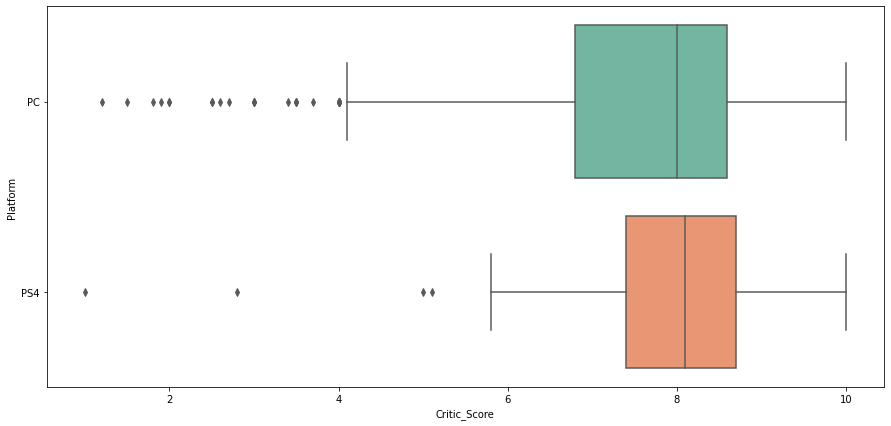

In [9]:
# Продемонстрируем различия визуально
import seaborn as sns
df2 = df2.loc[df2.Platform.isin(['PC','PS4'])]
ax = sns.boxplot(x=df2['Critic_Score'],y=df2['Platform'], data=df2, orient = 'h', palette="Set2")

 ## Различия есть, игры на PS4 в среднем оценивают выше. Об этом свидетельствует результат T-теста, а также знак его статистики

### 3. Критикам больше нравятся стрелялки или стратегии?

H0 - критикам нравятся игры одинаково

H1 - есть значимые отличия в оценках критиков

Критерий значимости примем на уровне 5%

In [10]:
df3 = df[['Genre','Critic_Score']].copy().dropna()

In [11]:
# разбиваем датасет на 2 выборки по жанру
df_shoot = df3.loc[df3.Genre == 'Shooter'].copy()
df_strat = df3.loc[df3.Genre == 'Strategy'].copy()

In [12]:
# используем 2-сторонний T-test с критерием Уэлча
result = st.ttest_ind(df_shoot['Critic_Score'], df_strat['Critic_Score'], equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, критики по-разному оценивают жанры')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=-1.6073949711166526, pvalue=0.10838786414223071)
Не отвергаем нулевую гипотезу


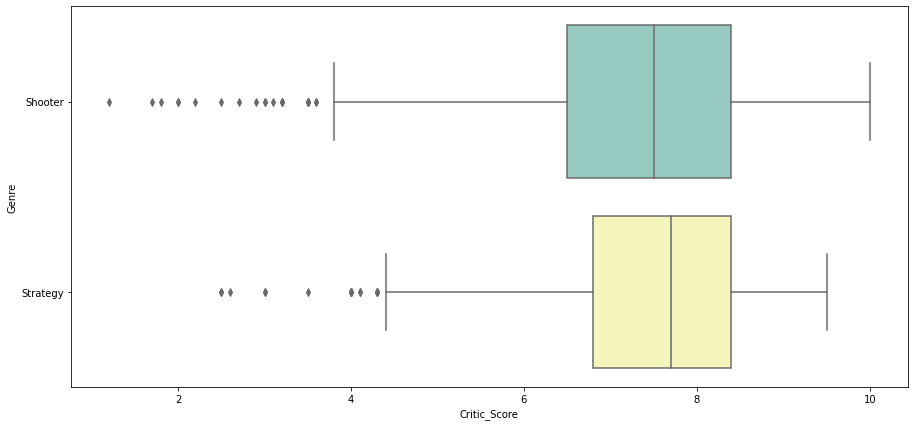

In [13]:
# Продемонстрируем различия визуально
df3 = df3.loc[df3.Genre.isin(['Shooter','Strategy'])]
ax = sns.boxplot(x=df3['Critic_Score'],y=df3['Genre'], data=df3, orient = 'h', palette="Set3")

## В этом случае мы не получаем достаточной уверенности в праве отклонения гипотезы о равенстве оценок двух жанров. Тем не менее в среднем жанр Shooters оценивают немного ниже чем Strategies.

### Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные здесь) по признаку спама. Для этого:

1) Привидите весь текст к нижнему регистру;

2) Удалите мусорные символы;

3) Удалите стоп-слова;

4) Привидите все слова к нормальной форме

5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:

```python
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
Можете поэкспериментировать с параметрами TfidfVectorizer;
```
6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42. Используйте train_test_split;

7) Постройте модель логистической регрессии, укажите random_state=42, оцените ее точность на тестовых данных;

8) Опишите результаты при помощи confusion_matrix;

9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [120]:
dff = pd.read_csv('DATA/spam.csv')
dff.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [121]:
# Приводим к нижнему регистру
dff['Message'] = dff['Message'].str.lower()
dff.head()

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [122]:
# оставляем только слова. Пишем функцию для датафрейма
import re
def words_getter(row):
    """оставляет в строке только слова без символов"""
    res = re.findall(r'\b\w+\b', row)
    row = " ".join(word for word in res)
    return row

In [123]:
dff['Message'] = dff['Message'].apply(words_getter)
dff.head()

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives arou...


In [124]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aerbi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [125]:
# загружаем функционал со стоп словами английского языка
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words('english'))

In [126]:
def stop_words_remover(row):
    """оставляет в строке только слова не входящие в список стоп-слов"""
    res = " ".join(s for s in [word for word in row.split() if word not in stopwords_set])
    return res

In [127]:
dff['Message'] = dff['Message'].apply(stop_words_remover)
dff.head()

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah think goes usf lives around though


In [128]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aerbi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [129]:
# проведем лемматизацию слов в сообщениях
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [130]:
def lemmawords(row):
    """оставляет в строке только слова не входящие в список стоп-слов"""
    res = " ".join(s for s in [wordnet_lemmatizer.lemmatize(word) for word in row.split()])
    return res

In [131]:
dff['Message'] = dff['Message'].apply(lemmawords)
dff.head()

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though


In [132]:
dff['Category'] = dff['Category'].map({'spam': 1, 'ham': 0})
dff

,Category,Message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah think go usf life around though
...,...,...
5567,1,2nd time tried 2 contact u u 750 pound prize 2...
5568,0,ü b going esplanade fr home
5569,0,pity mood suggestion
5570,0,guy bitching acted like interested buying some...


In [133]:
# преобразуем слова в вектора с помощью TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(dff.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

In [137]:
result = dff['Category'].to_list()

In [138]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(tfidf_matrix, result, test_size=0.3, random_state=42)

In [139]:
# создаем модель логистической регрессии
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)

In [140]:
# обучаем данные
lr.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [141]:
# оценим результат метрикой score
lr.score(x_test, y_test)

0.958732057416268

In [143]:
# оценим результат с помощью confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lr.predict(x_test))

array([[1445,    3],
       [  66,  158]], dtype=int64)

In [144]:
res_df = pd.DataFrame([y_test, lr.predict(x_test)]).T
res_df.columns = ['y_test','y_predict']
res_df = res_df.loc[res_df.y_test != res_df.y_predict]
res_df

,y_test,y_predict
17,0,1
40,1,0
47,1,0
74,1,0
84,1,0
...,...,...
1525,1,0
1567,1,0
1569,1,0
1576,0,1
